In [1]:
import numpy as np
import scipy as sp
import sympy as sy
from sympy import *
from sympy.plotting import plot_implicit, plot3d
init_printing()

In [2]:
var('x:4 b:4 a:4:4') [:16]

In [3]:
A = Matrix([[a11,a12],[a21,a22]])
b = Matrix([b1,b2])
x = Matrix([x1,x2])
qp2 = (x.T*A*x+b.T*x)[0].expand()
qp2

In [4]:
qp2.expand().collect([x1*x2,x1**2,x2**2,x1,x2])

In [5]:
A = Matrix([[a11,a12,a13],[a21,a22,a23],[a31,a32,a33]])
b = Matrix([b1,b2,b3])
x = Matrix([x1,x2,x3])
qp3 = (x.T*A*x+b.T*x)[0].expand()
qp3

In [6]:
qp3.expand().collect([x1*x2,x2*x3,x1*x3])

In [7]:
eq1 = 2*x1**2 + x2**2 + x1*x2 + x1 + x2

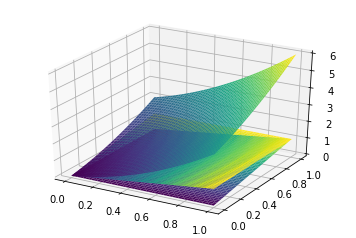

In [8]:
plot3d(x1,x2,eq1,(x1,0,1),(x2,0,1))

[Quadratic problem](http://cvxopt.org/examples/tutorial/qp.html)

![](http://cvxopt.org/_images/math/c9e7897d1d136af4134f0759edf09fe6dfa7a060.png)

CVXOPT cone solvers: [docs](http://cvxopt.org/userguide/coneprog.html)

![](http://cvxopt.org/userguide/_images/math/0fc8250d0300c13b08d7cab0aad81da39bbf3f13.png)

In [9]:
from cvxopt import solvers, matrix
P = 2*matrix([[2 , .5],
              [.5, 1 ]], tc='d')
q = matrix(   [1 , 1 ],  tc='d')
G = matrix([[1,0],
            [0,1]], tc='d') * -1
h = matrix( [0,0],  tc='d')
A = matrix([1,1], tc='d').T
b = matrix(1, tc='d')
solvers.options['show_progress'] = True
sol = solvers.qp(P,q,G,h,A,b)
np.array(sol['x']).round(6).ravel()

     pcost       dcost       gap    pres   dres
 0:  1.8889e+00  7.7778e-01  1e+00  3e-16  2e+00
 1:  1.8769e+00  1.8320e+00  4e-02  1e-16  6e-02
 2:  1.8750e+00  1.8739e+00  1e-03  2e-16  5e-04
 3:  1.8750e+00  1.8750e+00  1e-05  1e-16  5e-06
 4:  1.8750e+00  1.8750e+00  1e-07  3e-16  5e-08
Optimal solution found.


array([ 0.25,  0.75])

[Linear problem](http://cvxopt.org/examples/tutorial/lp.html)
![](http://cvxopt.org/_images/math/db4f673921a8ef61e3bb3f26bbdee1f6fda77ad6.png)

In [10]:
from cvxopt import solvers, matrix
c = matrix([2,1], tc='d')
A = matrix([[-1, -1,  0,  1],
            [ 1, -1, -1, -2]], tc='d')
b = matrix( [ 1, -2,  0,  4 ], tc='d')
solvers.options['show_progress'] = True
sol = solvers.lp(c,A,b)
np.array(sol['x']).round(6).ravel()

     pcost       dcost       gap    pres   dres   k/t
 0:  2.6471e+00 -7.0588e-01  2e+01  8e-01  2e+00  1e+00
 1:  3.0726e+00  2.8437e+00  1e+00  1e-01  2e-01  3e-01
 2:  2.4891e+00  2.4808e+00  1e-01  1e-02  2e-02  5e-02
 3:  2.4999e+00  2.4998e+00  1e-03  1e-04  2e-04  5e-04
 4:  2.5000e+00  2.5000e+00  1e-05  1e-06  2e-06  5e-06
 5:  2.5000e+00  2.5000e+00  1e-07  1e-08  2e-08  5e-08
Optimal solution found.


array([ 0.5,  1.5])

# ?????

In [16]:
n = 4
q = matrix(0., (n,n))
q[::n+1] = -1
np.array(q)

array([[-1.,  0.,  0.,  0.],
       [ 0., -1.,  0.,  0.],
       [ 0.,  0., -1.,  0.],
       [ 0.,  0.,  0., -1.]])

In [24]:
N = 10
[round(10**(t/N*5-1), 5) for t in range(N)]